SOLVING DATASET USING DATA AUGMENTED CNN MODEL

IMPORT NECESSARY LIBRARIES:-

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
print('Importing successfully done')

Importing successfully done


LOAD CIFAR-10 DATASET:-

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Summarize the dataset:

# The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. 
# The dataset is divided into 50,000 training images and 10,000 testing images. 
# The classes are 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' respectively.

PRE-PROCESSING THE DATASET:-

In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [8]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

DISPLAY IMAGES TO VERIFY THE DATA:-

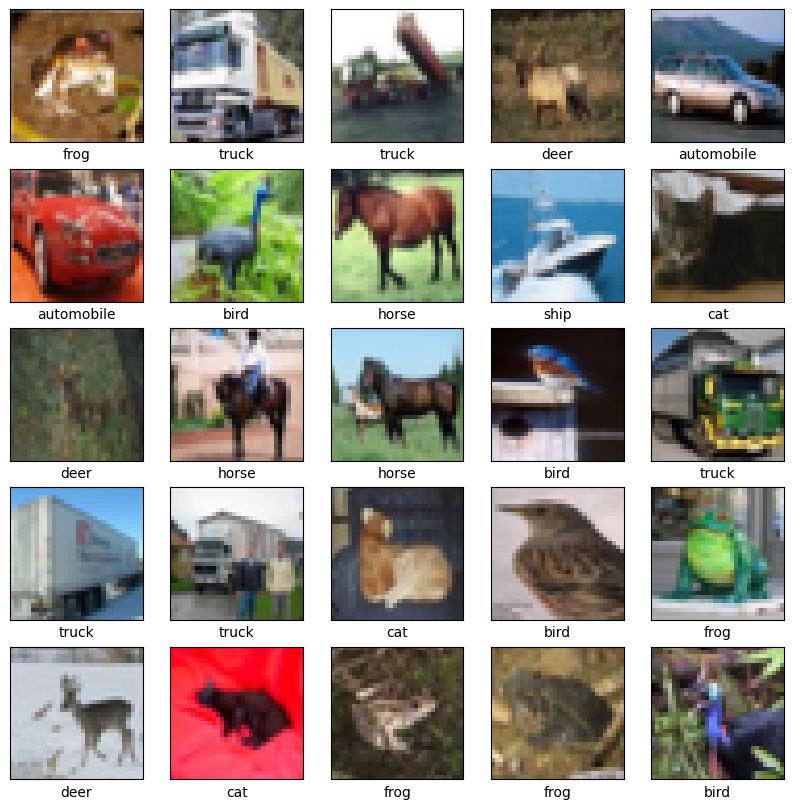

In [9]:
# Define class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display a grid of images with their labels
def display_images(images, labels, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Display first 25 images from the training set
display_images(x_train, y_train, class_names)

FEATURE SCALING OF THE DATA :-

In [10]:
# Normalize the images to a range of 0 to 1

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [11]:
# We import additional libraries

from tensorflow.keras.utils import to_categorical
print('Importing successfully done')

Importing successfully done


In [12]:
# One-hot encode the labels

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

DATA AUGMENTATION:-

In [14]:
# We import additional libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print('Importing successfully done')

Importing successfully done


In [15]:
datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
datagen.fit(x_train)

LOAD THE MODEL:-

In [16]:
# We import additional libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
print('Importing successfully done')

Importing successfully done


CREATING SEQUENTIAL MODEL (CNN)

In [17]:
# Build the model

model = Sequential()
model

<Sequential name=sequential, built=False>

ASSIGNING CONVOLUTIONAL LAYERS AND MAXPOOLING TO THE DATA

In [18]:
# Convolutional Layer 1

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

C:\Users\torne\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ADDING DENSE LAYERS:-

In [19]:
# Flatten the results to feed into a dense layer

model.add(Flatten())

In [20]:
# Fully connected layer

model.add(Dense(64, activation='relu'))

In [21]:
# Output layer

model.add(Dense(10, activation='softmax'))

COMPILE THE MODEL(CNN):-

In [22]:
# Compile the model

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
# Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

TRAIN THE MODEL(CNN):-

In [24]:
batch_size = 64
epochs = 50

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50


C:\Users\torne\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.2853 - loss: 1.9256 - val_accuracy: 0.4823 - val_loss: 1.4213
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6094 - loss: 1.2799

C:\Users\torne\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6094 - loss: 0.6408 - val_accuracy: 0.4878 - val_loss: 1.4123
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.4782 - loss: 1.4325 - val_accuracy: 0.5554 - val_loss: 1.2358
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5000 - loss: 0.6113 - val_accuracy: 0.5595 - val_loss: 1.2327
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.5369 - loss: 1.3026 - val_accuracy: 0.5501 - val_loss: 1.2515
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - loss: 0.6752 - val_accuracy: 0.5520 - val_loss: 1.2541
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.5658 - loss: 1.2230 - val_accuracy: 0.6092 - val_loss: 1.1082
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6406 - loss: 0.5034 - val_accuracy: 0.5984 - val_loss: 1.1350
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.5893 - loss: 1.1673 - val_accuracy: 0.59

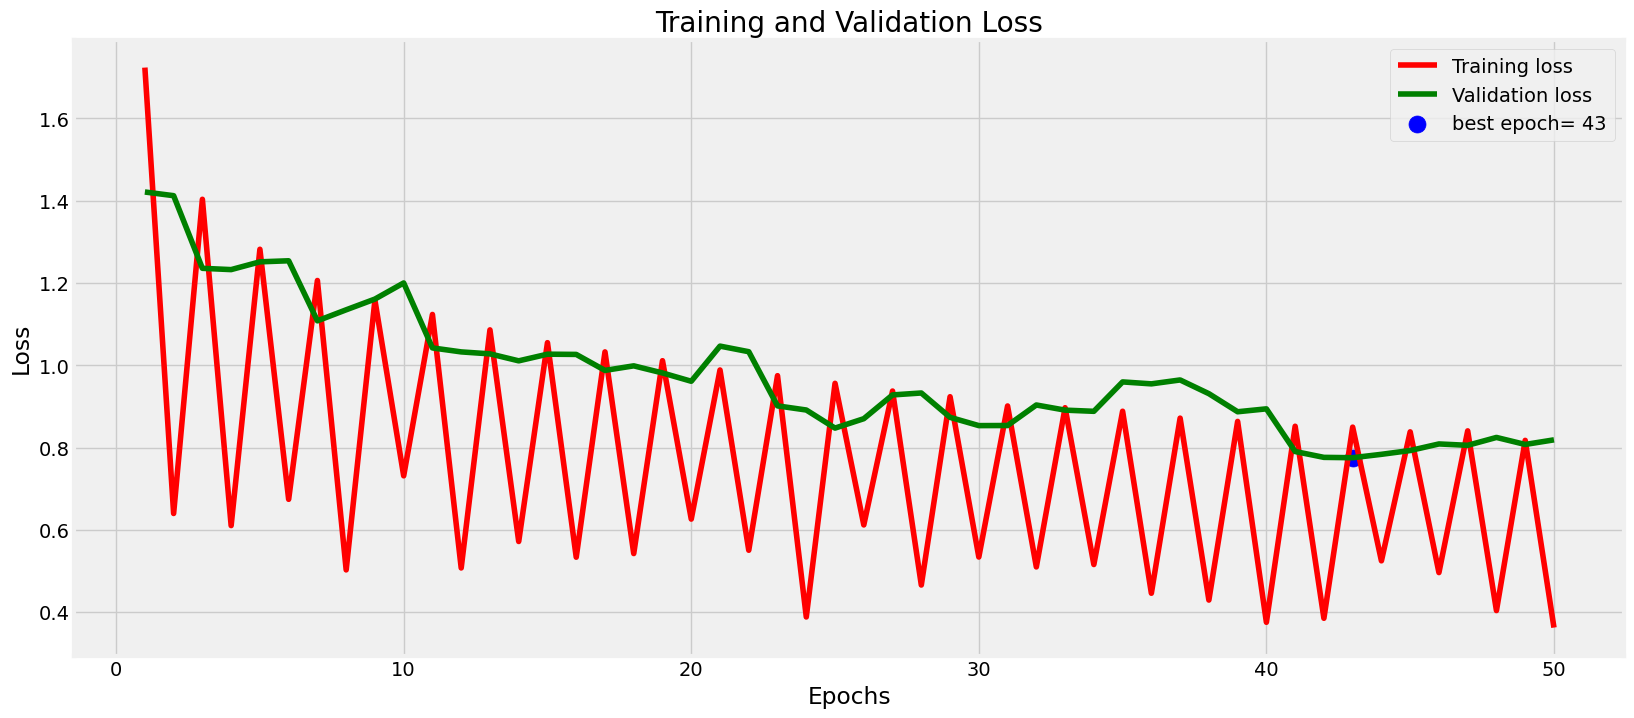

In [25]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [26]:
# Accuracy score:

val_accuracy = np.max(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 73.66%


In [27]:
# Now testing new Model prediction by providing Test Data set

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

EVALUATE THE MODEL (CNN):-

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7329 - loss: 0.7998
Test accuracy: 0.7279000282287598


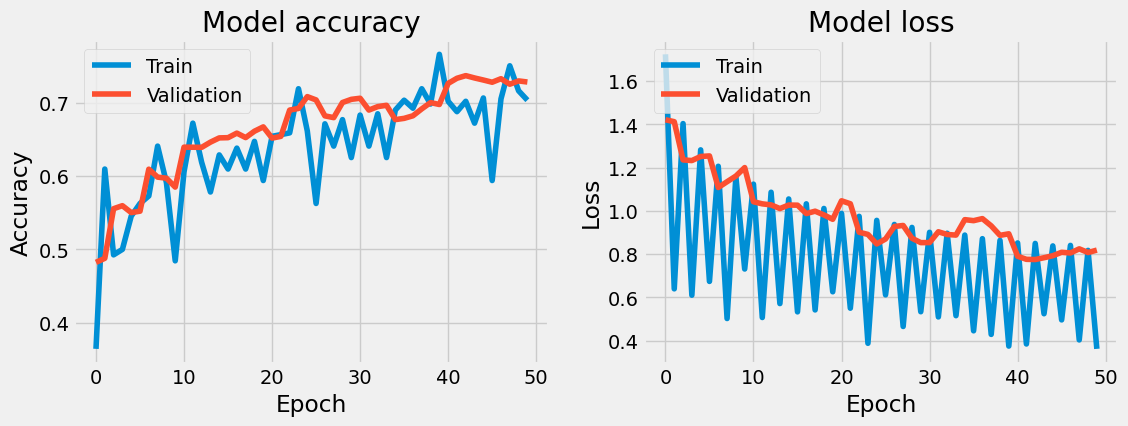

In [29]:
# Visualize training history

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [30]:
# Conclusion:

# We can see that the val_accuracy: 73.66%.
# The CNN model for this dataset gives us a Test accuracy: 72.79%.
# In order to obtain the above result, the best epoch was 43rd cycle which gave us the best result.